In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import LocalOutlierFactor
import numpy as np  
import pandas as pd 
from numpy import ma
import pandas as pd
import math
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import ticker, cm
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors
%matplotlib inline

import seaborn as sns

from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score, confusion_matrix, classification_report, precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import multivariate_normal
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler 

from keras import layers
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.layers import Embedding
from keras.utils import np_utils, to_categorical
from keras.datasets import imdb
#from keras import preprocessing
from keras.preprocessing.text import Tokenizer
from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.optimizers import Adam

from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout, GlobalAveragePooling1D
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K

In [6]:
dataRaw = pd.read_csv('SampleInputCut.txt', sep='\s+', header=None)
RawTS = dataRaw.copy()
print(RawTS.shape)
RawTS.columns = ['year', 'day', 'hour', 'minute', 'second', 'millisecond', 'val1', 'val2', 'val3', 'val4', 'val5', 'val6', 'val7', 'val8', 'val9', 'val10', 'val11', 'val12', 'val13', 'val14', 'val15', 'val16', 'val17', 'val18', 'val19', 'val20', 'val21', 'val22']
RawTS.reset_index(inplace=True)
RawTS.rename(columns={'index': 'Serial Number'}, inplace=True)
RawTS.head(50)

(20022, 28)


,Serial Number,year,day,hour,minute,second,millisecond,val1,val2,val3,...,val13,val14,val15,val16,val17,val18,val19,val20,val21,val22
0,0,2018,128,0,2,5,38,4,-0.0469,-0.0385,...,51.0,SYNC,ON,ON,ON,SYNC,NOT_USBL,ENA,LOW,ON
1,1,2018,128,0,2,10,158,14,-0.0469,-0.0385,...,51.0,SYNC,ON,ON,ON,SYNC,NOT_USBL,ENA,LOW,ON
2,2,2018,128,0,2,11,694,17,-0.0469,-0.0385,...,51.0,SYNC,ON,ON,ON,SYNC,NOT_USBL,ENA,LOW,ON
3,3,2018,128,0,2,13,230,20,-0.0469,-0.0385,...,51.0,SYNC,ON,ON,ON,SYNC,NOT_USBL,ENA,LOW,ON
4,4,2018,128,0,2,14,254,22,-0.0469,-0.0385,...,51.0,SYNC,ON,ON,ON,SYNC,NOT_USBL,ENA,LOW,ON
5,5,2018,128,0,2,14,766,23,-0.0469,-0.0385,...,51.0,SYNC,ON,ON,ON,SYNC,NOT_USBL,ENA,LOW,ON
6,6,2018,128,0,2,16,302,26,-0.0469,-0.0385,...,51.0,SYNC,ON,ON,ON,SYNC,NOT_USBL,ENA,LOW,ON
7,7,2018,128,0,2,17,838,29,-0.0469,-0.0385,...,51.0,SYNC,ON,ON,ON,SYNC,NOT_USBL,ENA,LOW,ON
8,8,2018,128,0,6,27,184,4,-0.0469,-0.0385,...,51.0,SYNC,ON,ON,ON,SYNC,NOT_USBL,ENA,LOW,ON
9,9,2018,128,0,6,32,304,14,-0.0469,-0.0385,...,51.0,SYNC,ON,ON,ON,SYNC,NOT_USBL,ENA,LOW,ON


In [7]:
unique_values14 = RawTS['val14'].unique()
unique_values15 = RawTS['val15'].unique()
unique_values16 = RawTS['val16'].unique()
unique_values17 = RawTS['val17'].unique()
unique_values18 = RawTS['val18'].unique()
unique_values19 = RawTS['val19'].unique()
unique_values20 = RawTS['val20'].unique()
unique_values21 = RawTS['val21'].unique()
unique_values22 = RawTS['val22'].unique()
# print the unique values
print(unique_values14)
print(unique_values15)
print(unique_values16)
print(unique_values17)
print(unique_values18)
print(unique_values19)
print(unique_values20)
print(unique_values21)
print(unique_values22)

['SYNC' 'NO_SYNC']
['ON' 'OFF']
['ON' 'OFF']
['ON' 'OFF']
['SYNC' 'NO_SYNC']
['NOT_USBL']
['ENA' 'DIS']
['LOW']
['ON' 'OFF']


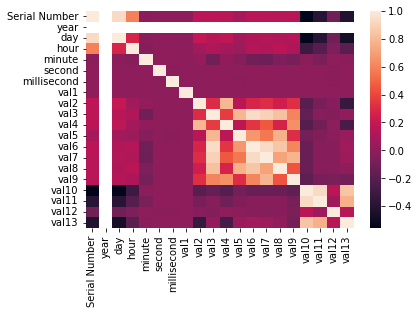

In [8]:
dataplot=sns.heatmap(RawTS.corr())
  
# displaying heatmap
plt.show()

In [9]:
RawTS['val14'] = RawTS['val14'].replace({'SYNC': 1, 'NO_SYNC': 0})
RawTS['val15'] = RawTS['val15'].replace({'ON': 1, 'OFF': 0})
RawTS['val16'] = RawTS['val16'].replace({'ON': 1, 'OFF': 0})
RawTS['val17'] = RawTS['val17'].replace({'ON': 1, 'OFF': 0})
RawTS['val18'] = RawTS['val18'].replace({'SYNC': 1, 'NO_SYNC': 0})
#RawTS['val19'] = RawTS['val19'].replace({'USBL': 1, 'NOT_USBL': 0})
RawTS['val22'] = RawTS['val22'].replace({'ON': 1, 'OFF': 0})
RawTS['val20'] = RawTS['val22'].replace({'ENA': 1, 'DIS': 0})
#RawTS = RawTS.drop('val21', axis=1)
#RawTS = RawTS.drop('val19', axis=1)
#RawTS['val1'] = RawTS['val1'].replace(RawTS['val1']/4)
RawTS.head()

,Serial Number,year,day,hour,minute,second,millisecond,val1,val2,val3,...,val13,val14,val15,val16,val17,val18,val19,val20,val21,val22
0,0,2018,128,0,2,5,38,4,-0.0469,-0.0385,...,51.0,1,1,1,1,1,NOT_USBL,1,LOW,1
1,1,2018,128,0,2,10,158,14,-0.0469,-0.0385,...,51.0,1,1,1,1,1,NOT_USBL,1,LOW,1
2,2,2018,128,0,2,11,694,17,-0.0469,-0.0385,...,51.0,1,1,1,1,1,NOT_USBL,1,LOW,1
3,3,2018,128,0,2,13,230,20,-0.0469,-0.0385,...,51.0,1,1,1,1,1,NOT_USBL,1,LOW,1
4,4,2018,128,0,2,14,254,22,-0.0469,-0.0385,...,51.0,1,1,1,1,1,NOT_USBL,1,LOW,1


In [10]:
labels = pd.read_csv('SampleInputCut.txt', sep='\s+', header=None)
print(labels.shape)
labels.head()

(20022, 28)


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,2018,128,0,2,5,38,4,-0.0469,-0.0385,0.00562,...,51.0,SYNC,ON,ON,ON,SYNC,NOT_USBL,ENA,LOW,ON
1,2018,128,0,2,10,158,14,-0.0469,-0.0385,0.00562,...,51.0,SYNC,ON,ON,ON,SYNC,NOT_USBL,ENA,LOW,ON
2,2018,128,0,2,11,694,17,-0.0469,-0.0385,0.00562,...,51.0,SYNC,ON,ON,ON,SYNC,NOT_USBL,ENA,LOW,ON
3,2018,128,0,2,13,230,20,-0.0469,-0.0385,0.00562,...,51.0,SYNC,ON,ON,ON,SYNC,NOT_USBL,ENA,LOW,ON
4,2018,128,0,2,14,254,22,-0.0469,-0.0385,0.00562,...,51.0,SYNC,ON,ON,ON,SYNC,NOT_USBL,ENA,LOW,ON


In [11]:
labels.value_counts(), labels.value_counts(normalize=True)

(0     1    2   3   4   5    6   7        8        9        10       11       12       13       14       15    16    17    18    19    20  21  22  23    24        25   26   27
 2018  128  0   2   5   38   4   -0.0469  -0.0385  0.00562  0.01096  -0.0981  -0.0687  0.00641  0.00789  37.0  51.0  38.0  51.0  SYNC  ON  ON  ON  SYNC  NOT_USBL  ENA  LOW  ON    1
       130  9   51  13  767  14  -0.0469  -0.0385  0.00582  0.01091   0.1294  -0.0687  0.00661  0.00809  37.0  52.0  38.0  51.0  SYNC  ON  ON  ON  SYNC  NOT_USBL  ENA  LOW  ON    1
                55  30  793  4   -0.0469  -0.0385  0.00582  0.01091  -0.0981  -0.0687  0.00656  0.00809  37.0  52.0  38.0  51.0  SYNC  ON  ON  ON  SYNC  NOT_USBL  ENA  LOW  ON    1
                51  21  447  29  -0.0469  -0.0385  0.00582  0.01091  -0.0981  -0.0687  0.00656  0.00809  37.0  52.0  38.0  51.0  SYNC  ON  ON  ON  SYNC  NOT_USBL  ENA  LOW  ON    1
                    19  911  26  -0.0469  -0.0385  0.00582  0.01091  -0.0981  -0.0687  0.00656  0.00

In [12]:
print('Any missing value ?',RawTS.isnull().values.any())

Any missing value ? False


In [13]:
RawTS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20022 entries, 0 to 20021
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Serial Number  20022 non-null  int64  
 1   year           20022 non-null  int64  
 2   day            20022 non-null  int64  
 3   hour           20022 non-null  int64  
 4   minute         20022 non-null  int64  
 5   second         20022 non-null  int64  
 6   millisecond    20022 non-null  int64  
 7   val1           20022 non-null  int64  
 8   val2           20022 non-null  float64
 9   val3           20022 non-null  float64
 10  val4           20022 non-null  float64
 11  val5           20022 non-null  float64
 12  val6           20022 non-null  float64
 13  val7           20022 non-null  float64
 14  val8           20022 non-null  float64
 15  val9           20022 non-null  float64
 16  val10          20022 non-null  float64
 17  val11          20022 non-null  float64
 18  val12 

In [14]:
RawTS.describe()

,Serial Number,year,day,hour,minute,second,millisecond,val1,val2,val3,...,val11,val12,val13,val14,val15,val16,val17,val18,val20,val22
count,20022.000000,20022.0,20022.000000,20022.000000,20022.000000,20022.000000,20022.000000,20022.000000,20022.000000,20022.000000,...,20022.00000,20022.000000,20022.000000,20022.000000,20022.000000,20022.000000,20022.000000,20022.000000,20022.000000,20022.000000
mean,10010.500000,2018.0,129.156977,11.509490,27.989112,29.463340,499.088353,19.373789,0.264992,0.075640,...,48.86380,35.497253,46.411547,0.884427,0.885476,0.963840,0.886824,0.962791,0.964389,0.964389
std,5779.997881,0.0,0.839786,6.666949,18.098521,17.300695,288.862170,7.311573,1.686209,0.808694,...,6.94326,23.236098,10.187824,0.319720,0.318455,0.186693,0.316815,0.189278,0.185322,0.185322
min,0.000000,2018.0,128.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-9.631300,-1.687700,...,12.00000,15.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5005.250000,2018.0,128.000000,5.000000,11.000000,14.000000,249.000000,17.000000,-0.046900,-0.038500,...,49.00000,34.000000,48.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,10010.500000,2018.0,129.000000,12.000000,28.000000,29.000000,498.000000,20.000000,-0.046900,-0.038500,...,51.00000,38.000000,51.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,15015.750000,2018.0,130.000000,17.000000,43.000000,44.000000,751.000000,23.000000,-0.046900,-0.038500,...,52.00000,38.000000,51.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,20021.000000,2018.0,130.000000,23.000000,59.000000,59.000000,999.000000,29.000000,10.678500,7.265100,...,53.00000,999.000000,52.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
RawTS.corr()

,Serial Number,year,day,hour,minute,second,millisecond,val1,val2,val3,...,val11,val12,val13,val14,val15,val16,val17,val18,val20,val22
Serial Number,1.000000,NaN,0.930594,0.587343,-0.012669,-0.001226,0.004233,0.000848,0.160657,0.164311,...,-0.394294,-0.114410,-0.420091,-0.287386,-0.284166,-0.180928,-0.282522,-0.185965,-0.181244,-0.181244
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,0.930594,NaN,1.000000,0.273438,-0.013088,-0.000644,0.004477,0.000603,0.191234,0.143530,...,-0.393996,-0.113001,-0.468543,-0.362893,-0.359908,-0.192533,-0.358624,-0.197351,-0.192906,-0.192906
hour,0.587343,NaN,0.273438,1.000000,-0.032159,-0.001757,0.000722,0.000451,0.064295,0.116617,...,-0.205902,-0.063240,-0.189278,-0.098511,-0.096519,-0.087045,-0.095452,-0.090024,-0.087430,-0.087430
minute,-0.012669,NaN,-0.013088,-0.032159,1.000000,-0.002307,0.001784,-0.000363,0.013859,-0.104078,...,-0.068640,-0.001710,-0.013944,0.003304,0.006283,-0.068603,0.010247,-0.073370,-0.065505,-0.065505
second,-0.001226,NaN,-0.000644,-0.001757,-0.002307,1.000000,-0.005818,-0.000459,-0.001393,0.001954,...,0.002849,-0.012002,0.001929,0.002241,0.001844,0.000471,0.003535,0.000964,0.002934,0.002934
millisecond,0.004233,NaN,0.004477,0.000722,0.001784,-0.005818,1.000000,0.000136,-0.001372,-0.004135,...,-0.001566,-0.012257,-0.002508,-0.002727,-0.002237,-0.002346,-0.002049,-0.002019,-0.001832,-0.001832
val1,0.000848,NaN,0.000603,0.000451,-0.000363,-0.000459,0.000136,1.000000,-0.001199,0.000361,...,-0.001009,-0.000011,-0.000872,-0.000813,-0.000320,0.000023,-0.000819,-0.000813,-0.000829,-0.000829
val2,0.160657,NaN,0.191234,0.064295,0.013859,-0.001393,-0.001372,-0.001199,1.000000,0.300306,...,-0.079110,-0.026485,-0.331050,-0.362362,-0.364900,0.027934,-0.368109,0.027756,0.026644,0.026644
val3,0.164311,NaN,0.143530,0.116617,-0.104078,0.001954,-0.004135,0.000361,0.300306,1.000000,...,-0.034360,-0.035674,0.012843,0.061127,0.059854,0.017986,0.058414,0.017446,0.016994,0.016994


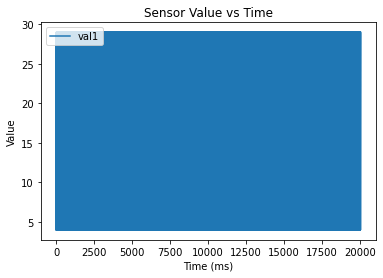

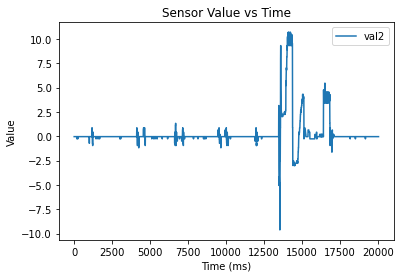

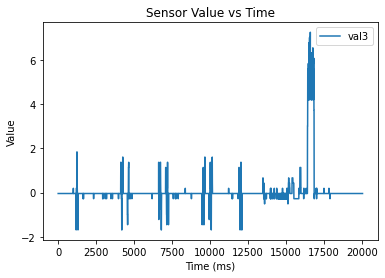

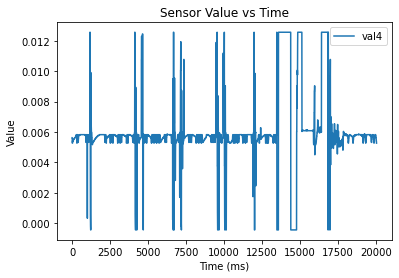

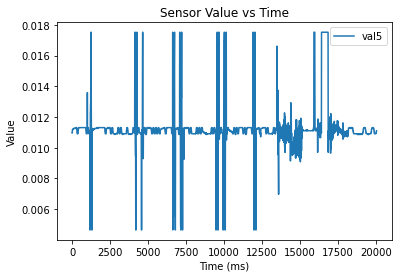

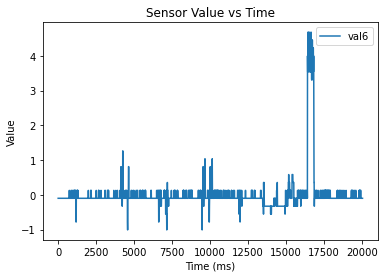

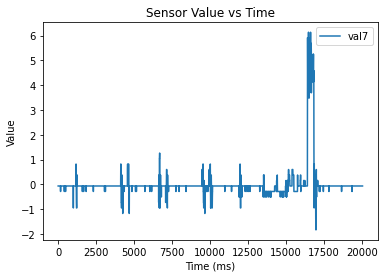

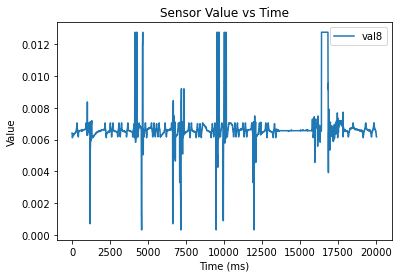

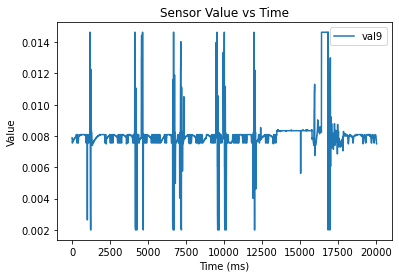

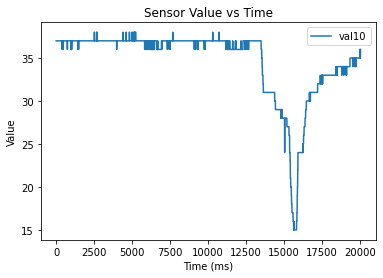

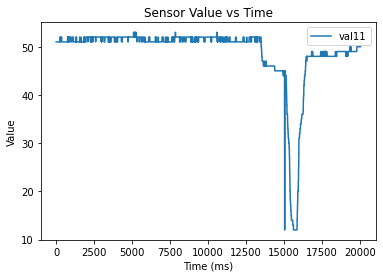

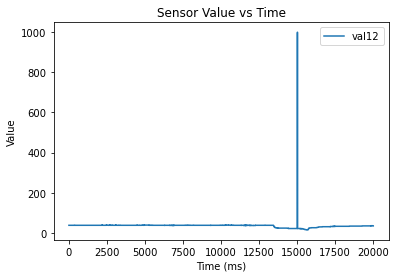

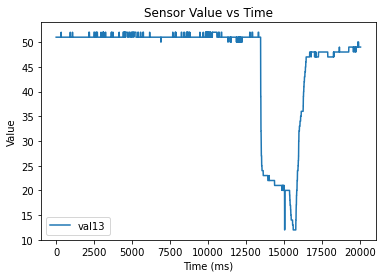

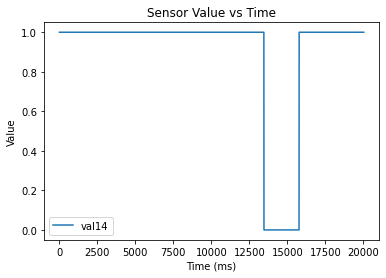

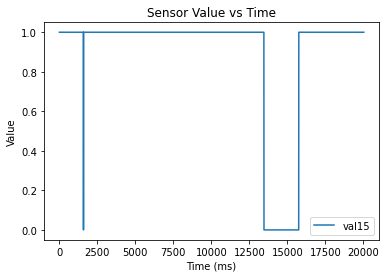

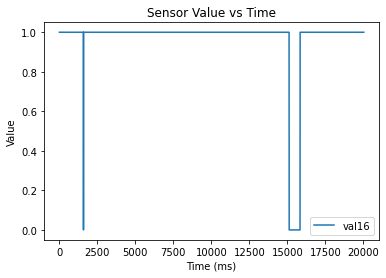

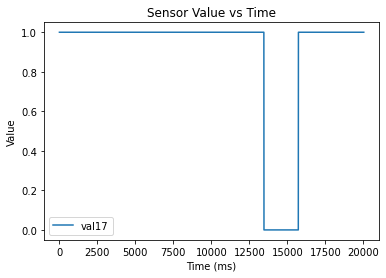

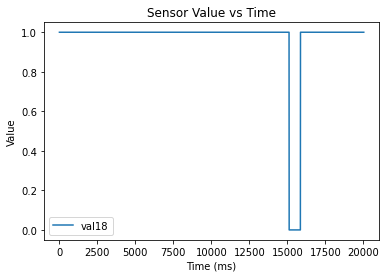

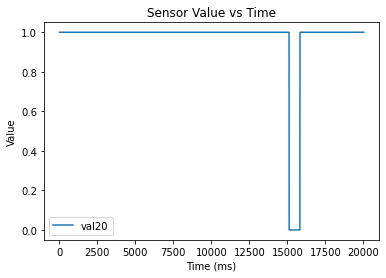

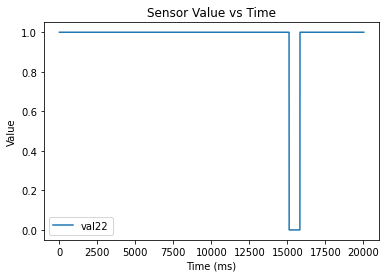

In [16]:
for i in range(1, 23):
    # Plot the column against the 'Serial Number' column
    if i==19 or i==21:
        continue
    else:
        plt.plot(RawTS['Serial Number'], RawTS[f'val{i}'], label=f'val{i}')
        plt.xlabel('Time (ms)')
        plt.ylabel('Value')
        plt.title('Sensor Value vs Time')
        plt.legend()

# Show the plot
        plt.show()
    


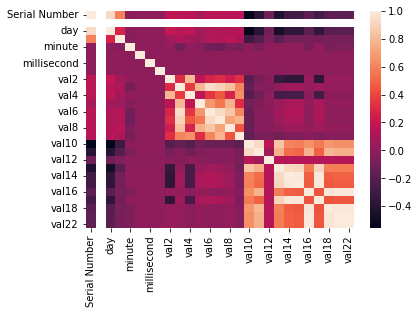

In [17]:
dataplot=sns.heatmap(RawTS.corr())
  
# displaying heatmap
plt.show()

In [18]:
RawTS.head()

,Serial Number,year,day,hour,minute,second,millisecond,val1,val2,val3,...,val13,val14,val15,val16,val17,val18,val19,val20,val21,val22
0,0,2018,128,0,2,5,38,4,-0.0469,-0.0385,...,51.0,1,1,1,1,1,NOT_USBL,1,LOW,1
1,1,2018,128,0,2,10,158,14,-0.0469,-0.0385,...,51.0,1,1,1,1,1,NOT_USBL,1,LOW,1
2,2,2018,128,0,2,11,694,17,-0.0469,-0.0385,...,51.0,1,1,1,1,1,NOT_USBL,1,LOW,1
3,3,2018,128,0,2,13,230,20,-0.0469,-0.0385,...,51.0,1,1,1,1,1,NOT_USBL,1,LOW,1
4,4,2018,128,0,2,14,254,22,-0.0469,-0.0385,...,51.0,1,1,1,1,1,NOT_USBL,1,LOW,1


In [19]:
RawTS.head()

,Serial Number,year,day,hour,minute,second,millisecond,val1,val2,val3,...,val13,val14,val15,val16,val17,val18,val19,val20,val21,val22
0,0,2018,128,0,2,5,38,4,-0.0469,-0.0385,...,51.0,1,1,1,1,1,NOT_USBL,1,LOW,1
1,1,2018,128,0,2,10,158,14,-0.0469,-0.0385,...,51.0,1,1,1,1,1,NOT_USBL,1,LOW,1
2,2,2018,128,0,2,11,694,17,-0.0469,-0.0385,...,51.0,1,1,1,1,1,NOT_USBL,1,LOW,1
3,3,2018,128,0,2,13,230,20,-0.0469,-0.0385,...,51.0,1,1,1,1,1,NOT_USBL,1,LOW,1
4,4,2018,128,0,2,14,254,22,-0.0469,-0.0385,...,51.0,1,1,1,1,1,NOT_USBL,1,LOW,1


In [24]:
RawTS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20022 entries, 0 to 20021
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Serial Number  20022 non-null  int64  
 1   year           20022 non-null  int64  
 2   day            20022 non-null  int64  
 3   hour           20022 non-null  int64  
 4   minute         20022 non-null  int64  
 5   second         20022 non-null  int64  
 6   millisecond    20022 non-null  int64  
 7   val1           20022 non-null  int64  
 8   val2           20022 non-null  float64
 9   val3           20022 non-null  float64
 10  val4           20022 non-null  float64
 11  val5           20022 non-null  float64
 12  val6           20022 non-null  float64
 13  val7           20022 non-null  float64
 14  val8           20022 non-null  float64
 15  val9           20022 non-null  float64
 16  val10          20022 non-null  float64
 17  val11          20022 non-null  float64
 18  val12 

In [46]:
#look at the data types to see which columns need to be encoded
df.dtypes

year             int64
day              int64
hour             int64
minute           int64
second           int64
millisecond      int64
val1             int64
val2           float64
val3           float64
val4           float64
val5           float64
val6           float64
val7           float64
val8           float64
val9           float64
val10          float64
val11          float64
val12          float64
val13          float64
val14           object
val15            int64
val16           object
val17           object
val18           object
val19           object
val20           object
val21           object
val22           object
dtype: object

In [37]:
RawTS.isnull().sum()

Serial Number    0
year             0
day              0
hour             0
minute           0
second           0
millisecond      0
val1             0
val2             0
val3             0
val4             0
val5             0
val6             0
val7             0
val8             0
val9             0
val10            0
val11            0
val12            0
val13            0
val14            0
val15            0
val16            0
val17            0
val18            0
val19            0
val20            0
val21            0
val22            0
anomaly          0
dtype: int64

In [40]:
point = 99  # Index starts from 0, so the third point has index 2
status = RawTS.loc[point, 'val14']
time = RawTS.loc[point, 'millisecond']
print(f"Status: {status}, Time: {time} ms")

Status: 1, Time: 594 ms


In [27]:
to_model_columns=RawTS.columns[7:18]

In [28]:
from sklearn.ensemble import IsolationForest
clf=IsolationForest(n_estimators=100, max_samples='auto', \
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
clf.fit(RawTS[to_model_columns])

IsolationForest(n_jobs=-1, random_state=42)

In [29]:
pred = clf.predict(RawTS[to_model_columns])
RawTS['anomaly']=pred
outliers=RawTS.loc[RawTS['anomaly']==1]
outlier_index=list(outliers.index)
#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(RawTS['anomaly'].value_counts())

 1    17428
-1     2594
Name: anomaly, dtype: int64


In [41]:
def classify_anomalies(df,metric_name):
    df['metric_name']=metric_name
    df = df.sort_values(by='load_date', ascending=False)
    #Shift actuals by one timestamp to find the percentage chage between current and previous data point
    df['shift'] = df['actuals'].shift(-1)
    df['percentage_change'] = ((df['actuals'] - df['shift']) / df['actuals']) * 100
    #Categorise anomalies as 0-no anomaly, 1- low anomaly , 2 - high anomaly
    df['anomaly'].loc[df['anomaly'] == 1] = 0
    df['anomaly'].loc[df['anomaly'] == -1] = 2
    df['anomaly_class'] = df['anomaly']
    max_anomaly_score = df['score'].loc[df['anomaly_class'] == 2].max()
    medium_percentile = df['score'].quantile(0.24)
    df['anomaly_class'].loc[(df['score'] > max_anomaly_score) & (df['score'] <= medium_percentile)] = 1
    return df

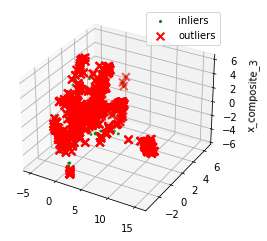

In [42]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
pca = PCA(n_components=3)  # Reduce to k=3 dimensions
scaler = StandardScaler()
#normalize the metrics
X = scaler.fit_transform(RawTS[to_model_columns])
X_reduce = pca.fit_transform(X)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")

# Plot the compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=1, label="inliers",c="green")

# Plot x's for the ground truth outliers
ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1], X_reduce[outlier_index,2],
           lw=2, s=60, marker="x", c="red", label="outliers")
ax.legend()
plt.show()

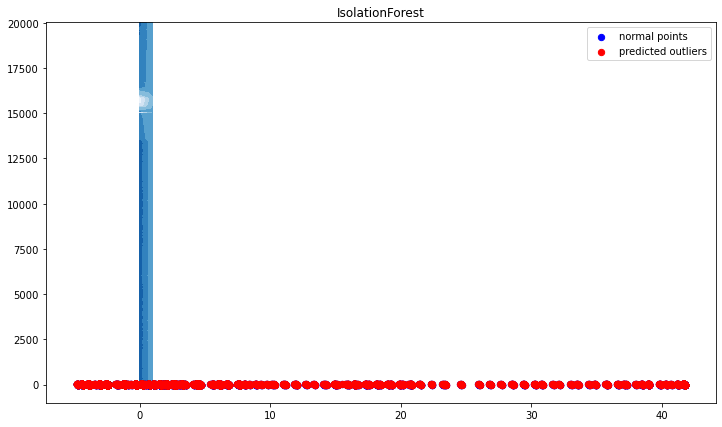

In [43]:
from sklearn.decomposition import PCA
pca = PCA(2)
pca.fit(RawTS[to_model_columns])


res=pd.DataFrame(pca.transform(RawTS[to_model_columns]))

Z = np.array(res)
figsize=(12, 7)
plt.figure(figsize=figsize)
plt.title("IsolationForest")
plt.contourf( Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(res[0], res[1], c='blue',
                 s=40,label="normal points")

b1 = plt.scatter(res.iloc[outlier_index,0],res.iloc[outlier_index,1], c='red',
                 s=40,  edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")
plt.show()